In [ ]:
!pip install matplotlib==3.5.1

In [1]:
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
PATH = "/content/drive/MyDrive/gh/datascience/dacon/job_care_clf/dataset"
train = pd.read_csv(PATH + "/train.csv")
test = pd.read_csv(PATH + "/test.csv")
sample_submission = pd.read_csv(PATH + "/sample_submission.csv")

In [3]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [4]:
# timestamps
train['contents_open_dt'].sort_values()

82335     2020-01-01 00:01:03
459788    2020-01-01 00:03:51
138066    2020-01-01 00:05:48
488251    2020-01-01 00:10:19
398093    2020-01-01 00:14:14
                 ...         
403141    2020-11-30 23:54:05
220979    2020-11-30 23:54:58
361188    2020-11-30 23:55:00
303341    2020-11-30 23:56:58
304230    2020-11-30 23:59:56
Name: contents_open_dt, Length: 501951, dtype: object

In [5]:
# 각 컬럼의 유니크값이 몇개인지?
origin = []
for i in train.columns:
    print(f"{i} :",len(train[f'{i}'].unique()))
    origin.append(len(train[f'{i}'].unique()))

id : 501951
d_l_match_yn : 2
d_m_match_yn : 2
d_s_match_yn : 2
h_l_match_yn : 2
h_m_match_yn : 2
h_s_match_yn : 2
person_attribute_a : 2
person_attribute_a_1 : 8
person_attribute_b : 6
person_prefer_c : 5
person_prefer_d_1 : 1093
person_prefer_d_2 : 1081
person_prefer_d_3 : 1043
person_prefer_e : 12
person_prefer_f : 1
person_prefer_g : 1
person_prefer_h_1 : 279
person_prefer_h_2 : 279
person_prefer_h_3 : 279
contents_attribute_i : 3
contents_attribute_a : 3
contents_attribute_j_1 : 9
contents_attribute_j : 2
contents_attribute_c : 4
contents_attribute_k : 2
contents_attribute_l : 1752
contents_attribute_d : 1065
contents_attribute_m : 5
contents_attribute_e : 12
contents_attribute_h : 250
person_rn : 300177
contents_rn : 283359
contents_open_dt : 494952
target : 2


In [6]:
# 그럼 타겟을 분리한 후 유니크값을 뽑아보면 어떻게 될까?
train_target_0 = train.loc[train['target'] == 0]
train_target_1 = train.loc[train['target'] == 1]

unique_traget_0 = []
unique_traget_1 = []

for i in train_target_0.columns:
    #print(f"{i} :",len(train_target_0[f'{i}'].unique()))
    unique_traget_0.append(len(train_target_0[f'{i}'].unique()))

for j in train_target_1.columns:
    #print(f"{i} :",len(train_target_1[f'{i}'].unique()))
    unique_traget_1.append(len(train_target_1[f'{j}'].unique()))

for k in range(len(unique_traget_0)):
    print(train.columns[k],">>>",origin[k],unique_traget_0[k],unique_traget_1[k])

id >>> 501951 251106 250845
d_l_match_yn >>> 2 2 2
d_m_match_yn >>> 2 2 2
d_s_match_yn >>> 2 2 2
h_l_match_yn >>> 2 2 2
h_m_match_yn >>> 2 2 2
h_s_match_yn >>> 2 2 2
person_attribute_a >>> 2 2 2
person_attribute_a_1 >>> 8 8 8
person_attribute_b >>> 6 6 6
person_prefer_c >>> 5 5 5
person_prefer_d_1 >>> 1093 1069 1085
person_prefer_d_2 >>> 1081 1051 1057
person_prefer_d_3 >>> 1043 997 1005
person_prefer_e >>> 12 12 12
person_prefer_f >>> 1 1 1
person_prefer_g >>> 1 1 1
person_prefer_h_1 >>> 279 278 279
person_prefer_h_2 >>> 279 279 278
person_prefer_h_3 >>> 279 278 276
contents_attribute_i >>> 3 3 3
contents_attribute_a >>> 3 3 3
contents_attribute_j_1 >>> 9 9 9
contents_attribute_j >>> 2 2 2
contents_attribute_c >>> 4 4 4
contents_attribute_k >>> 2 2 2
contents_attribute_l >>> 1752 1731 1663
contents_attribute_d >>> 1065 1058 1021
contents_attribute_m >>> 5 5 5
contents_attribute_e >>> 12 12 12
contents_attribute_h >>> 250 250 250
person_rn >>> 300177 172345 181498
contents_rn >>> 28335

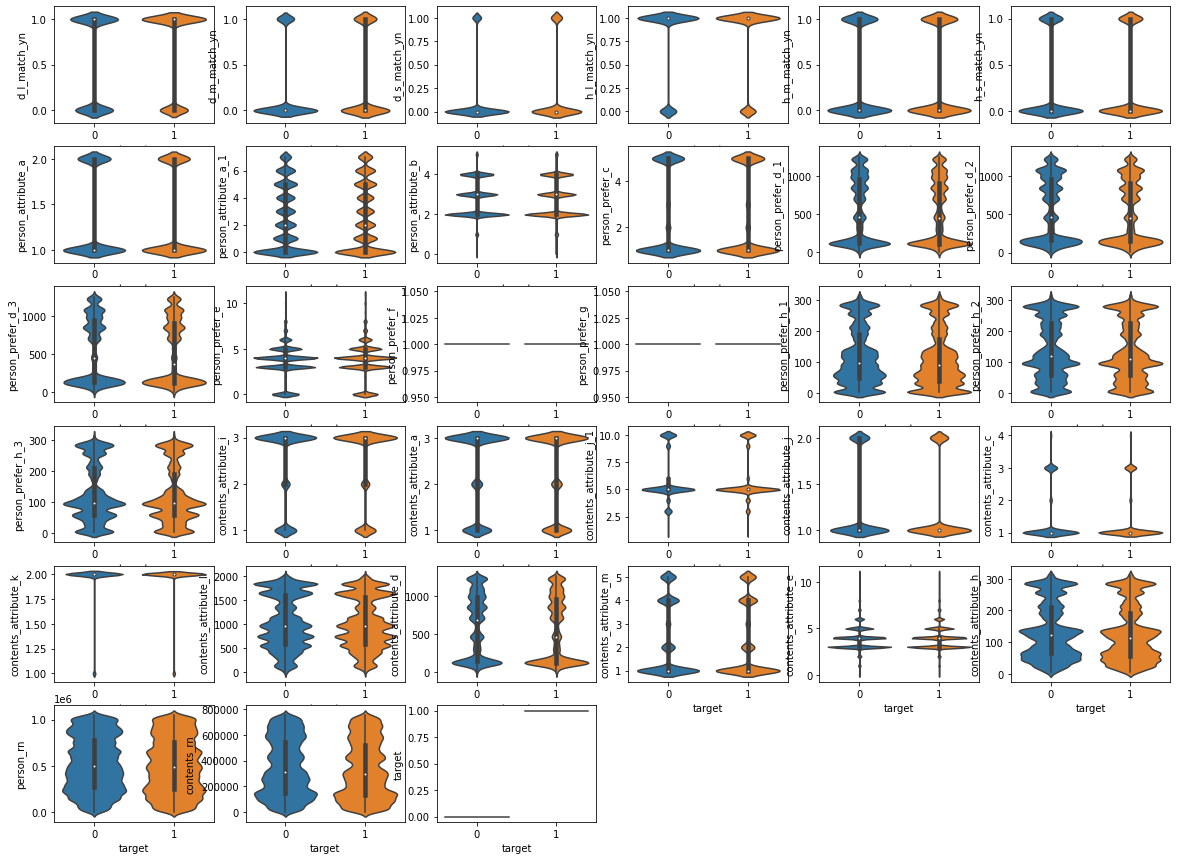

In [7]:
# 각 컬럼의 카테고리가 타겟에 대해 어떻게 분포되어 있는지
train_no_dt=train.drop(columns=['id','contents_open_dt'])
fig = plt.figure(figsize=(20,15))

for idx, i in enumerate(train_no_dt.columns):
    fig.add_subplot(6,6,idx+1)
    sns.violinplot(data=train_no_dt,x='target',y=f'{i}')


In [ ]:
from sklearn import preprocessing
train_cramer = train.drop(columns=['id','contents_open_dt','contents_rn','person_rn','person_prefer_f','person_prefer_g'])

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for i in train_cramer.columns :
    data_encoded[i]=label.fit_transform(train_cramer[i])

In [22]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
    crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))


In [23]:
rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        cramers = cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
df

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target
d_l_match_yn,1.00,0.21,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.11,0.06,0.08,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.03,0.15,0.00,0.01,0.01,0.02
d_m_match_yn,0.21,1.00,0.49,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.14,0.07,0.09,0.01,0.01,0.01,0.01,0.00,0.02,0.01,0.00,0.00,0.00,0.03,0.15,0.00,0.00,0.01,0.01
d_s_match_yn,0.10,0.49,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.06,0.07,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.02,0.13,0.00,0.00,0.01,0.01
h_l_match_yn,0.00,0.00,0.00,1.00,0.15,0.10,0.00,0.01,0.01,0.00,0.07,0.06,0.06,0.05,0.25,0.13,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.06,0.01,0.04,0.06,0.00
h_m_match_yn,0.00,0.00,0.00,0.15,1.00,0.65,0.00,0.01,0.01,0.00,0.06,0.05,0.05,0.03,0.45,0.20,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.04,0.01,0.02,0.24,0.00
h_s_match_yn,0.00,0.00,0.00,0.10,0.65,1.00,0.00,0.00,0.01,0.00,0.05,0.04,0.04,0.02,0.46,0.18,0.21,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.04,0.01,0.01,0.20,0.00
person_attribute_a,0.00,0.01,0.00,0.00,0.00,0.00,1.00,0.74,0.00,0.00,0.09,0.05,0.05,0.05,0.01,0.01,0.01,0.00,0.03,0.00,0.00,0.00,0.00,0.02,0.03,0.00,0.01,0.01,0.00
person_attribute_a_1,0.00,0.00,0.00,0.01,0.01,0.00,0.74,1.00,0.00,0.00,0.03,0.03,0.02,0.02,0.01,0.01,0.01,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.00
person_attribute_b,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,1.00,0.00,0.07,0.06,0.05,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.00,0.00,0.01,0.00
person_prefer_c,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.03,0.02,0.02,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00


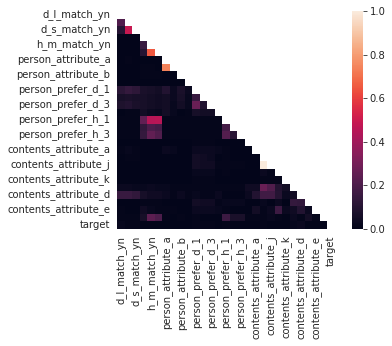

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt



mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

In [8]:
pd.crosstab(train['target'],train['d_l_match_yn'],normalize='index')

d_l_match_yn,False,True
target,,
0,0.440834,0.559166
1,0.302924,0.697076


d_l_match_yn,False,True
target,,
0,110696,140410
1,75987,174858


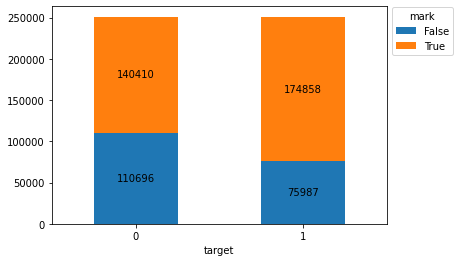

In [25]:
ct = pd.crosstab(train['target'],train['d_l_match_yn'])
    
ax = ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')
ct

In [20]:
# from dateutil.parser import parse
# years, months, days = [],[],[]
# for i in range(len(train)):
#     dt=parse(train['contents_open_dt'][i])
#     years.append(dt.year)
#     months.append(dt.month)
#     days.append(dt.day)

# train['year'] = years
# train['month'] = months
# train['day'] = days